## Cloud sync

Um zu prüfen, ob zwei Dateien identisch sind verwenden wir den Algorithmus, der in der Vorlesung vorgestellt wurde.

Hilfreiche Imports und Definitionen

In [2]:
from random import randint,getrandbits
import numpy as np
import pickle

Byte = 8
KB   = 1024*Byte
MB   = 1024*KB
GB   = 1024*MB

Funktionen, um große Datenblöcke zu generierren

In [3]:
def generate_data(size):
    return randint(0,2**size)

def write_data(data, filename='db'):
    with open(filename, 'wb') as file:
        pickle.dump(data, file)
        file.close()
        
def read_data(filename='db'):
    with open(filename, 'rb') as file:
        return pickle.load(file)
    
def flush_data():
    write_data(None)

In [4]:
x=generate_data(1*MB)

Die folgende Funktion modifiziert eine Stelle der Dezimaldarstellung einer Zahl

In [5]:
def modify_random_digit(data):
    s = str(data)
    i = randint(0, len(s)-1)
    return int(s[:i]+chr(ord('0')+(int(s[i])+1)%10)+s[i+1:])

testen ...

In [6]:
modify_random_digit(123456789)

223456789

Wir kreieren nun eine Funktion um eine gegeben Anzahl an Kopien eines Datensatzes zu erzeugen

In [7]:
def create_copies(file, num_copies):
    data=read_data(file)
    rand_binary_list = [randint(0, 1) for b in range(1, num_copies+1)]
    
    for modify in range(len(rand_binary_list)):
        if rand_binary_list[modify]:
            new_data = modify_random_digit(data)
            write_data(new_data, filename='db'+str(modify))
        else:
            write_data(data, filename='db'+str(modify))
    return rand_binary_list

#### Ein paar Tests, um die Laufzeit zu testen

In [8]:
# For testing
%timeit -n1 -r10 generate_data(size=1*MB)

23 ms ± 1.48 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


In [9]:
d = generate_data(size=100*Byte); 
display(d)
display('{:b}'.format(d))

4657352486374832172769555068157995466397650377382934991438744100342579363170396312546009532088895819738842094981183868994821619356463894683121217861079187156078862641700111172078211954773991586830271525258215501090465668508958624996778802087

'10110010110011100110001001000111101110000010011010101010010000010110001101111101001001011101001000111010000010001110010010011001101111110100001011010101000010111111011000101011100000110101110001110111011100011101110111100111001000101011010111100001001100001010100101011100000001010101011010001001000101001011100001110100110000001011001111010101010110111111011000001001110011111100101110001001111101111001110010000100111001110001101000100011011011100000000110001111110101110001010000001001110010010010011110111001011111110101101010101011101010010000111110100010010100001000100110100111011011011010110101001011001111011001000011100100100000011001110110011011110100000101001010100000000111010001010000111000010101001010001111111000000000111011101010110111111001011010110001011010101111110111101110100111'

In [10]:
# For testing
%timeit -n1 -r10 write_data(d)

The slowest run took 160.64 times longer than the fastest. This could mean that an intermediate result is being cached.
669 µs ± 1.86 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


In [11]:
write_data(d)

In [12]:
# For testing
%timeit -n1 -r10 modify_random_digit(d)

The slowest run took 6.61 times longer than the fastest. This could mean that an intermediate result is being cached.
4.91 µs ± 4.16 µs per loop (mean ± std. dev. of 10 runs, 1 loop each)


In [13]:
d1 = modify_random_digit(d); display(d1)
d-d1

4657352486374832172769555068157995466397650377482934991438744100342579363170396312546009532088895819738842094981183868994821619356463894683121217861079187156078862641700111172078211954773991586830271525258215501090465668508958624996778802087

-100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [14]:
# For testing
%timeit -n1 -r10 create_copies('db', num_copies=5)

The slowest run took 24.69 times longer than the fastest. This could mean that an intermediate result is being cached.
667 µs ± 1.24 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


modify_copy = create_copies('db', num_copies=5)
print('modified copies: ', modify_copy)

#### Erzeugung von Zahlen, die mit hoher Wahrscheinlichkeit prim sind
(Implementierung hier <http://www.inf.fh-flensburg.de/lang/krypto/algo/primtest.htm> geklaut)
implementiere einen einfachen Fermat-Test

In [15]:
import numpy as np
import pdb

def binary(e):
    return bin(e)[2:]

def modexp(m, e, n):
    s=1
    for b in binary(e):
        s=s*s % n
        #pdb.set_trace()
        if b=="1":
            s=s*m % n
            #pdb.set_trace()
    return s

def isCompositeSimpleFermat(n):
    '''
    Returns true if n is definitely composite.
    If returns false, then n is a prime number with a high probability.
    '''
    return modexp(2, n-1, n) != 1

Nun können wir Funktionen definieren, die prüfen, ob eine Zahl zusammengesetzt oder prim ist (mit hoher W-keit)

In [16]:
def isComposite(n):
    return isCompositeSimpleFermat(n)

def generateProbablePrim(n):
    while True:
        x=randint(0,n)
        if not isComposite(x) :
            return x

... und testen dies

In [17]:
x=generateProbablePrim((10*GB)**2)
display(x)
display(isComposite(x))

display(isComposite(x+1))

2112701038346654523893

False

True

### Aufgaben:

1. Implementieren Sie den Cloud Syncing Algorithmus, der in der letzten Vorlesung präsentiert wurde.
1. Erzeugen Sie Datenblöcke unterschiedlicher Größe und evaluieren Sie Ihre Implementierung
1. Verifizieren Sie die theoretische Fehlerwahrscheinlichkeit Ihres Algorithmus (mit kleinen Datenbanken!)
1. Plotten Sie das theoretische gegen das experimentelle Ergebnis

#### 1)
Implementierung Cloud Sync Algorithmus

In [18]:
def create_checksum(x):
    n = x.bit_length()**2
    p = generateProbablePrim(n)
    s = x % p
    return s,p

def validate_checksum(x, p, s):
    return s == x % p

#### 2)
Evaluierung (Test) des Cloud Syncing Algorithmus

In [19]:
# build differently sized data blocks and test algorithm correctnes and runtime
results_1 =[]
#create Bytesized Datablocks
for i in range(1,100):
    write_data(generate_data(i*Byte))
    s, p = create_checksum(read_data())
    b = validate_checksum(read_data(),p,s)
    results_1.append((read_data().bit_length(),b))
#create Kilobyte sized Datablocks
for i in range(1,10):
    write_data(generate_data(i*KB))
    s, p = create_checksum(read_data())
    b = validate_checksum(read_data(),p,s)
    results_1.append((read_data().bit_length(),b))
#create Megabyte sized Datablocks
for i in range(1,3):
    write_data(generate_data(i*MB))
    s, p = create_checksum(read_data())
    b = validate_checksum(read_data(),p,s)
    results_1.append((read_data().bit_length(),b))


In [20]:
#testet alle Ergebnisse, ob falsch negative Ereignisse auftreten
lst_1 = []
for result in results_1:
    if result[1] == False:
        lst_1.append(result)
print('Es wurden ' +str(len(lst_1))+' falsch negative Ergebnisse gefunden')

Es wurden 0 falsch negative Ergebnisse gefunden


In [21]:
# build once again data blocks and manipulate random representative to test false negatives
results_2 = []
for i in range(1,100):
    write_data(generate_data(i*Byte))
    s, p = create_checksum(read_data())
    write_data(modify_random_digit(read_data()))
    b = validate_checksum(read_data(),p,s)
    results_2.append((read_data().bit_length(),b))
#create Kilobyte sized Datablocks
for i in range(1,10):
    write_data(generate_data(i*KB))
    s, p = create_checksum(read_data())
    write_data(modify_random_digit(read_data()))
    b = validate_checksum(read_data(),p,s)
    results_2.append((read_data().bit_length(),b))
    #create Megabyte sized Datablocks
for i in range(1,1):
    write_data(generate_data(i*MB))
    s, p = create_checksum(read_data())
    write_data(modify_random_digit(read_data()))
    b = validate_checksum(read_data(),p,s)
    results_2.append((read_data().bit_length(),b))


In [22]:
#testet alle Ergebnisse, ob falsch negative Ereignisse auftreten
lst_2 = []
for result in results_2:
    if result[1] == True:
        lst_2.append(result)
print('Es wurden ' +str(len(lst_2))+' falsch positive Ergebnisse gefunden')

Es wurden 0 falsch positive Ergebnisse gefunden


#### 3)
Theoretische Fehlerwahrscheinlichkeit gegen Algorithmus Fehlerwahrscheinlichkeit.

Theoretische Fehlerwahrscheinlichkeit:


$$
    \small
    \text{n = Laenge des zu pruefenden Datenblocks.}\\
    p=\frac{2\ln(2^{n})}{2^{n}}
$$

In [23]:
import numpy as np
import math
#Funktion in Abhaengigkeit der Laenge des Datenblocks ausrechnen. 
theo = [2 * math.log2(2**n)/(2**n) for n in [2**m for m in range(1,6)]]
#Dann ausprobieren mit 2) Evaluierung des Algorithmus
lst_1 = lst_1 + lst_2
print('Insgesamt sind ' +str(len(lst_1))+' falsche Ergebnisse aufgetreten')

Insgesamt sind 0 falsche Ergebnisse aufgetreten


#### 4)
Ergebnisse aus 3) plotten

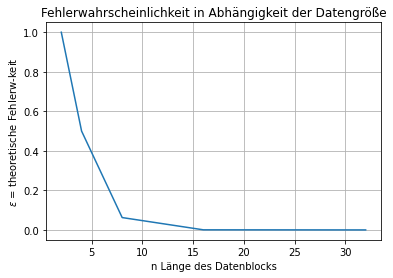

In [29]:
import matplotlib.pyplot as plt
plt.plot([2**m for m in range(1,6)],theo)
plt.title('Fehlerwahrscheinlichkeit in Abhängigkeit der Datengröße')
plt.xlabel('n Länge des Datenblocks')
plt.ylabel('$\epsilon$ = theoretische Fehlerw-keit')
plt.grid(True)
plt.show()

In [ ]:
flush_data() #eventuelle große Dateien löschen